# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [49]:
#Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#load the data from the csv to dataframe
bike_sharing = pd.read_csv("day.csv")

In [52]:
#looking at the first five rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [53]:
#check the datatypes
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [54]:
bike_sharing.shape

(730, 16)

In [55]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning

### Fixing the datatypes where categorical datatype needed

In [56]:
#dropping unnecessary columns instant, dteday, casual, registered columns as deleting this wont affect the analysis
#dropping atemp column as its very much correlated to temp column
bike_sharing = bike_sharing.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis = 1)

In [57]:
#check the data
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [58]:
#checking valuecounts for column season
bike_sharing['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [59]:
#Replacing the values 1, 2, 3, 4 to labels spring, summer, fall, winter respectively
bike_sharing['season'] = bike_sharing['season'].replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'])

In [60]:
#check the labels if properly replaced or not
bike_sharing['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [61]:
#check the datatype
bike_sharing['season'].dtype

dtype('O')

In [62]:
#checking the mnth column valuecounts
bike_sharing['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [63]:
#Replacing the values 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 to labels jan, feb, mar, apr, may, jun, jul, aug, sep, oct,
#nov dec respectively
bike_sharing['mnth'] = bike_sharing['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

#check the labels if properly replaced or not
print(bike_sharing['mnth'].value_counts())

#check the datatype
bike_sharing['mnth'].dtype

may    62
aug    62
jan    62
mar    62
jul    62
oct    62
dec    62
nov    60
sep    60
apr    60
jun    60
feb    56
Name: mnth, dtype: int64


dtype('O')

In [64]:
#weekday valuecounts
bike_sharing['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [65]:
#Replacing the values 0, 1, 2, 3, 4, 5, 6 to labels sun, mon, tue, wed, thurs, fri, sat respectively
bike_sharing['weekday'] = bike_sharing['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['sun', 'mon', 'tue', 'wed', 'thurs', 'fri', 'sat'])

#check the labels if properly replaced or not
print(bike_sharing['weekday'].value_counts())

#check the datatype
bike_sharing['weekday'].dtype

sat      105
mon      105
sun      105
tue      104
thurs    104
fri      104
wed      103
Name: weekday, dtype: int64


dtype('O')

In [66]:
#weathersit valuecounts
bike_sharing['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [67]:
#Replacing the values 1, 2, 3 to labels clear, mist+cloudy, light snow/rain respectively
bike_sharing['weathersit'] = bike_sharing['weathersit'].replace([1, 2, 3], ['clear', 'mist+cloudy', 'light snow/rain'])

#check the labels if properly replaced or not
print(bike_sharing['weathersit'].value_counts())

#check the datatype
bike_sharing['weathersit'].dtype

clear              463
mist+cloudy        246
light snow/rain     21
Name: weathersit, dtype: int64


dtype('O')

In [72]:
#target column which explains demand of bikes is cnt
bike_sharing['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

## Step 3: Data Visualisation using EDA
- Perform EDA to understand various variables
- check the correlation between the variables

### Univariate Analysis

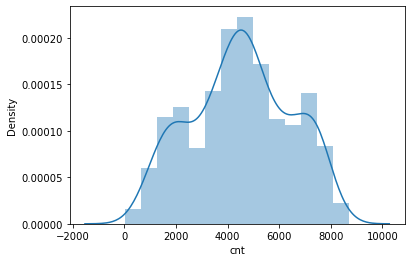

In [152]:
#Distribution plot for count
sns.distplot(bike_sharing['cnt'])
plt.show()

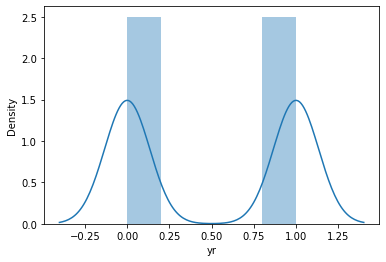

In [153]:
#Distribution plot for yr
sns.distplot(bike_sharing['yr'])
plt.show()

### Bivariate Analysis

<AxesSubplot:>

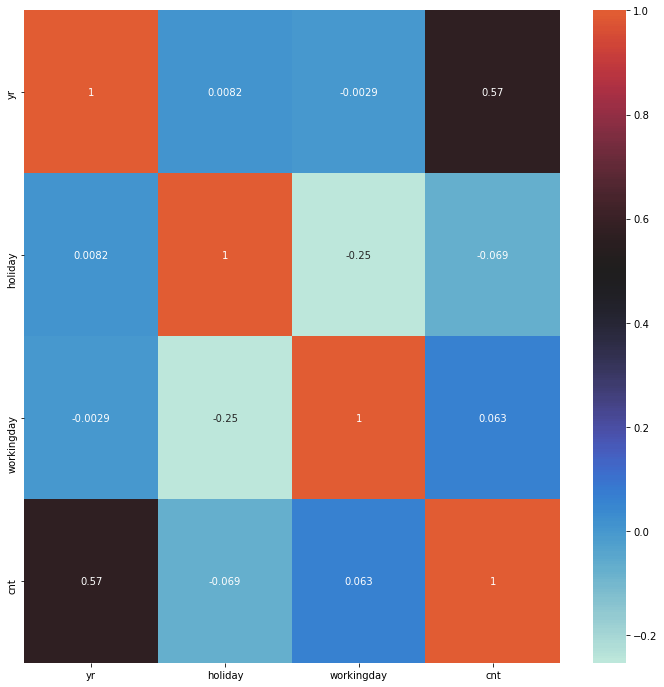

In [162]:
plt.figure(figsize=(12,12))
var= ['yr','holiday', 'workingday','cnt']
corr = bike_sharing[var].corr()
sns.heatmap(corr, annot=True, center=0.5)

In [166]:
sns.pairplot(bike_sharing)
plt.show()

KeyError: ('yr', 'holiday', 'workingday', 'cnt')

## Step 4: Data Preparation
- Create dummy variables for all the categorical features.
- Divide the data to train and test.
- Perform scaling.
- Divide the data into X and y.

In [87]:
#Create dummy variables for all the categorical features.
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonvar'
# Let's drop the first column from seasonvar df using 'drop_first = True'
seasonvar = pd.get_dummies(bike_sharing['season'], drop_first = True)

# Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, seasonvar], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [88]:
# Drop 'season' as we have created the dummies for it
bike_sharing.drop(['season'], axis = 1, inplace = True)

bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [89]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnthvar'
# Let's drop the first column from mnthvar df using 'drop_first = True'
mnthvar = pd.get_dummies(bike_sharing['mnth'], drop_first = True)

# Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, mnthvar], axis = 1)

# Now let's see the head of our dataframe.
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,sat,0,mist+cloudy,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [90]:
# Drop 'mnth' as we have created the dummies for it
bike_sharing.drop(['mnth'], axis = 1, inplace = True)

bike_sharing.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sat,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekdayvar'
# Let's drop the first column from weekdayvar df using 'drop_first = True'
weekdayvar = pd.get_dummies(bike_sharing['weekday'], drop_first = True)

#Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, weekdayvar], axis = 1)

# Check the head of our dataframe
bike_sharing.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tue,wed
0,0,0,sat,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [92]:
#drop weekday as we have created dummies for it
bike_sharing.drop(['weekday'], axis = 1, inplace = True)

#check the head of the dataframe
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thurs,tue,wed
0,0,0,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersitvar'
# Let's drop the first column from weathersitvar df using 'drop_first = True'
weathersitvar = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)

#add the results to the original dataframe
bike_sharing = pd.concat([bike_sharing, weathersitvar], axis = 1)

# Check the dataframe head
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thurs,tue,wed,light snow/rain,mist+cloudy
0,0,0,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [94]:
#drop the weathersit column as we have created dummies for it
bike_sharing.drop(['weathersit'], axis = 1, inplace = True)

#check the head of the dataframe
bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tue,wed,light snow/rain,mist+cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
#so now we have below columns
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  aug              730 non-null    uint8  
 11  dec              730 non-null    uint8  
 12  feb              730 non-null    uint8  
 13  jan              730 non-null    uint8  
 14  jul              730 non-null    uint8  
 15  jun              730 non-null    uint8  
 16  mar              730 non-null    uint8  
 17  may             

In [96]:
#Divide the data to train and test
from sklearn.model_selection import train_test_split

#we specify this so that the train and test dataset always have the same rows, respectively
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [97]:
#Perform scaling
#we will use MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
#apply the scaler to all the columns except the yes-no and dummy variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tue,wed,light snow/rain,mist+cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [99]:
#Divide the data into X and y
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Data Modelling and Evaluation
- Check Linear Regression model using mixed approach(RFE and VIF/p-value
- Check the various assumptions.
- Check the Adjusted R-Square for both test and train data.
- Report the final model.

In [100]:
#Check Linear Regression model using mixed approach(RFE and VIF/p-value)
#Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [101]:
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thurs', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('light snow/rain', True, 1),
 ('mist+cloudy', True, 1)]

In [103]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'light snow/rain',
       'mist+cloudy'],
      dtype='object')

In [104]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thurs', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [106]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [108]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [109]:
#running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [110]:
#let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          2.31e-191
Time:                        22:25:17   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036     

In [111]:
X_train_new = X_train_rfe.drop(['const'], axis = 1)

In [114]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                                                                   

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist+cloudy,2.29
0,yr,2.09
12,sat,1.98


Removing humidity feature as it has the highest VIF value

In [115]:
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

### Rebuilding the model without hum

In [116]:
#adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new1)

In [117]:
#running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()

In [118]:
#let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          7.33e-189
Time:                        22:52:43   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031     

In [122]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,sat,1.97
8,jan,1.62
9,jul,1.59


### Removing temp as it has the highest VIF value

In [123]:
X_train_new2 = X_train_new1.drop(["temp"], axis = 1)

#### Rebuilding the model without temp

In [124]:
#adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new2)

#running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()

#let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          4.04e-154
Time:                        23:03:04   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5448      0.020     

In [125]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,sat,1.69
7,jan,1.60
12,mist+cloudy,1.56
8,jul,1.30


#### VIF value for all the features is <=5
#### so now lets remove features based on the p-value, holiday has the highest p-value so it is insignificant in presence of other
#### variables, so it can be dropped

In [126]:
X_train_new3 = X_train_new2.drop(["holiday"], axis = 1)

#### Rebuilding the model without holiday

In [127]:
#adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new3)

#running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()

#let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          1.54e-154
Time:                        23:08:55   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5368      0.020     

In [128]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
3,spring,2.92
4,summer,2.25
5,winter,1.92
0,yr,1.91
9,sat,1.62
6,jan,1.60
11,mist+cloudy,1.56
7,jul,1.29


#### VIF value for all the features is <=5
#### so now lets remove features based on the p-value, jul has the highest p-value so it is insignificant in presence of other
#### variables, so it can be dropped

In [129]:
X_train_new4 = X_train_new3.drop(["jul"], axis = 1)

#### Rebuilding the model without jul

In [130]:
#adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new4)

#running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()

#let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          1.30e-155
Time:                        23:13:23   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5334      0.018     

In [131]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,1.99
0,yr,1.88
5,winter,1.73
6,jan,1.60
8,sat,1.56
10,mist+cloudy,1.56
7,sep,1.18


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [132]:
y_train_cnt = lm.predict(X_train_lm)

In [133]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

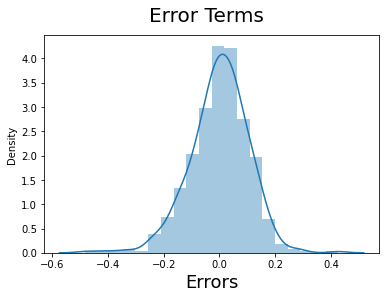

In [134]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions

#### Applying the scaling on the test sets

In [135]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [136]:
y_test = df_test.pop('cnt')
X_test = df_test

In [137]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [138]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

### Calculate R-square

In [140]:
#calculate r-square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7409269375982522

Text(0, 0.5, 'y_pred')

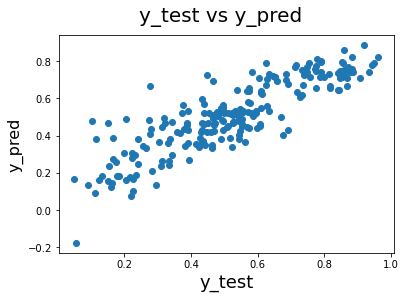

In [141]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ cnt = 0.2480  \times  yr + 0.0567  \times  workingday - 0.1887 \times windspeed - 0.2581 \times spring - 0.0406 \times summer - 0.0729 \times winter - 0.1031 \times jan + 0.0714 \times sep + 0.0650 \times sat - 0.3034 \times light snow/rain - 0.0888 \times mist+cloudy + 0.5334 $